In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15717703351599940154
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2585465209075166116
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 18382571413302044992
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11326753997
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15206935293971628557
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [ ]:
#To Check if keras(>=2.1.1) is using GPU:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.
W0815 20:07:20.989093 140032638306176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0815 20:07:20.990550 140032638306176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0815 20:07:20.995489 140032638306176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0815 20:07:20.998919 140032638306176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



[]

In [ ]:
#查看所有cpu/gpu设备
import os
from tensorflow.python.client import device_lib
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "99"

if __name__ == "__main__":
    print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6661332056807161931
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5130019935956942364
physical_device_desc: "device: XLA_CPU device"
]


In [ ]:
'''
import tensorflow as tf
#Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
#Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
#Runs the op.
print(sess.run(c))
'''

#比较CPU & GPU效率
import tensorflow as tf
import time

def performanceTest(device_name,size):
    with tf.device(device_name):
        W = tf.random_normal([size, size], name='W')
        X = tf.random_normal([size, size], name='X')
        mul = tf.matmul(W, X, name='mul')
        sum_result = tf.reduce_sum(mul, name='sum')

    startTime = time.time()
    tfconfig = tf.ConfigProto(log_device_placement=True)
    with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

    takeTimes = time.time() - startTime
    print(device_name, "矩阵大小：",size,"x",size, " 时间:",takeTimes)
    return takeTimes


gpu_set = [];cpu_set = [];i_set = []
xgpu_set, xcpu_set = [],[]
for i in range(0, 5001, 200):
    c = performanceTest("/cpu:0",i)
    xc = performanceTest("/device:XLA_CPU:0",i)
    g = performanceTest("/gpu:0",i)
    xg = performanceTest("/device:XLA_GPU:0",i)

    gpu_set.append(g)
    xgpu_set.append(xg)
    xcpu_set.append(xc)
    cpu_set.append(c)
    i_set.append(i)
#matplotlib inline

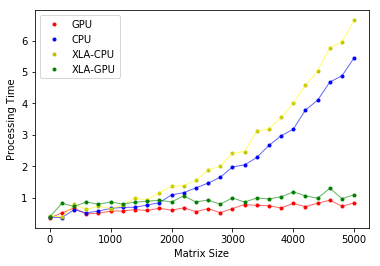

In [ ]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.xlabel('Matrix Size')
plt.ylabel('Processing Time')
plt.plot(i_set, gpu_set, 'r.',label='GPU')
plt.plot(i_set,gpu_set, color='r',linewidth=1, alpha=0.6)
plt.plot(i_set, cpu_set, 'b.',label='CPU')
plt.plot(i_set, cpu_set, color='b',linewidth=1, alpha=0.6)
plt.plot(i_set, xcpu_set, 'y.',label='XLA-CPU')
plt.plot(i_set, xcpu_set, color='yellow',linewidth=1, alpha=0.6)
plt.plot(i_set, xgpu_set, 'g.',label='XLA-GPU')
plt.plot(i_set, xgpu_set, color='green',linewidth=1, alpha=0.6)
plt.legend()
plt.show()


In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

W0723 14:19:10.812348 140036920207232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0723 14:19:10.816299 140036920207232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0723 14:19:10.820162 140036920207232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0723 14:19:10.833035 140036920207232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



['/job:localhost/replica:0/task:0/device:GPU:0']

In [ ]:
#使用GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8735052697582921890
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 812361520498424047
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5635680043758312409
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14892338381
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1258833171312668759
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
#Google colab
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13464478159851644876
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1623654344774132595
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 3165899048703365059
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14892338381
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3023719055407613045
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]
